<a href="https://www.kaggle.com/code/jovanchua/dog-breed-identification-with-pytorch?scriptVersionId=139270261" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/scottish_deerhound/cdffff7690054e91eab8e7237df12406.jpg
/kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/scottish_deerhound/b7bcf988b4dff199ec966696225a3aa0.jpg
/kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/scottish_deerhound/8470a6fdf4db9b088494aaa9384ba9d0.jpg
/kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/scottish_deerhound/056b535b441278e83839984f1b1da0a6.jpg
/kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/scottish_deerhound/a234febaeeba77417fd731d9c5d3a692.jpg
/kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/scottish_deerhound/a32893132f6fbb3635df77c157c7d8e0.jpg
/kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/scottish_deerhound/fe50bac6c389d137ea01c9cfc7346ca8.jpg
/kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/scottish_deerhound/c3008b4470c7c53a12d4490e51643548.jpg
/kaggle/input/mini-dog-breed-identificat

# Importing libraries and datasets

## Importing libraries

In [2]:
import os
import gc
import warnings
import glob
from pathlib import Path
from collections import defaultdict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image

%matplotlib inline
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Importing data

In [3]:
data_path = Path("/kaggle/input/")
image_path = data_path / "mini-dog-breed-identification/Mini Dog Breed Data"
for dirpath, dirnames, filenames in os.walk(image_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 5 directories and 0 images in '/kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data'.
There are 0 directories and 126 images in '/kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/scottish_deerhound'.
There are 0 directories and 95 images in '/kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/siberian_husky'.
There are 0 directories and 82 images in '/kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/yorkshire_terrier'.
There are 0 directories and 90 images in '/kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/silky_terrier'.
There are 0 directories and 84 images in '/kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/saint_bernard'.


# Data setup

In [4]:
img_path_list = list(image_path.glob('*/*.jpg'))
results = []
for path in img_path_list:
    class_name = path.parent.stem
    results.append((path, class_name))

## Separating into paths and labels

In [5]:
df = pd.DataFrame.from_dict(dict(results), orient = 'index', columns = ['Label']).reset_index().rename(columns={'index': 'Path'})
df.head()

,Path,Label
0,/kaggle/input/mini-dog-breed-identification/Mi...,scottish_deerhound
1,/kaggle/input/mini-dog-breed-identification/Mi...,scottish_deerhound
2,/kaggle/input/mini-dog-breed-identification/Mi...,scottish_deerhound
3,/kaggle/input/mini-dog-breed-identification/Mi...,scottish_deerhound
4,/kaggle/input/mini-dog-breed-identification/Mi...,scottish_deerhound


# Visualisation and exploration

Path: /kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/silky_terrier/5203d0c7afc103dc8e4c1cd99ff93e9e.jpg
Class: silky_terrier
Img height: 500
Img width: 375


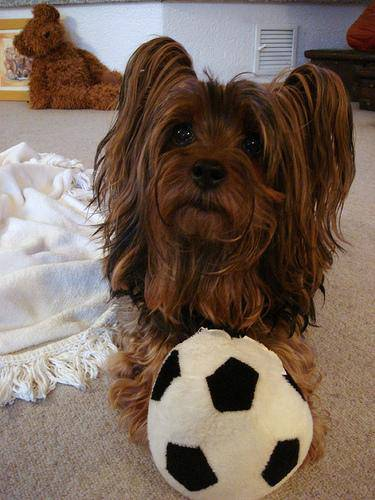

In [6]:
import random

random.seed(19)
random_img_path = random.choice(img_path_list)
img_class = random_img_path.parent.stem

img = Image.open(random_img_path)
print(f"Path: {random_img_path}")
print(f"Class: {img_class}")
print(f"Img height: {img.height}")
print(f"Img width: {img.width}")
img

## Class breakdown

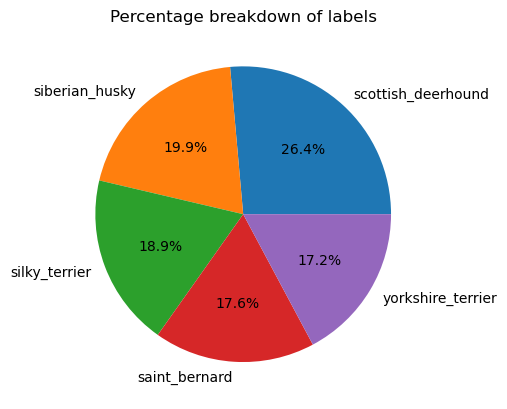

In [7]:
plt.pie(df.Label.value_counts().values, labels = df.Label.value_counts().index, autopct = '%1.1f%%')
# plt.legend(loc = 'lower left')
plt.title('Percentage breakdown of labels')
plt.show()

In [8]:
class_names = df.Label.unique()
class_names

array(['scottish_deerhound', 'siberian_husky', 'yorkshire_terrier',
       'silky_terrier', 'saint_bernard'], dtype=object)

In [9]:
class_names_encoded = {label: i for i, label in enumerate(class_names)}
class_names_encoded

{'scottish_deerhound': 0,
 'siberian_husky': 1,
 'yorkshire_terrier': 2,
 'silky_terrier': 3,
 'saint_bernard': 4}

In [10]:
df.Label = df.Label.map(class_names_encoded)
df.Label.value_counts()

0    126
1     95
3     90
4     84
2     82
Name: Label, dtype: int64

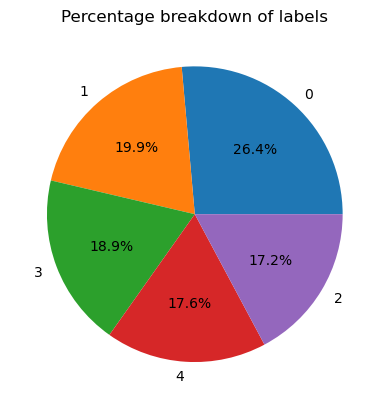

In [11]:
plt.pie(df.Label.value_counts().values, labels = df.Label.value_counts().index, autopct = '%1.1f%%')
# plt.legend(loc = 'lower left')
plt.title('Percentage breakdown of labels')
plt.show()

# Modelling

In [12]:
import torch
from torch import nn
from torch.nn import Module
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision import transforms

## Custom Image Dataset class for path and label dataframe

In [13]:
class imageDataset(Dataset):
    def __init__(self, df, transform = None):
        self.df = df
        self.transform = transform
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        img_path = self.df.loc[idx, 'Path']
        img = Image.open(img_path).convert('RGB')
        label = self.df.loc[idx, 'Label']
        
        if self.transform:
            img = self.transform(img)
            
        return img, torch.tensor(label)

## Transformations for each image

In [14]:
transform = transforms.Compose([
    transforms.Resize(size = (224,224)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.RandomVerticalFlip(p = 0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

## Splitting into train and test sets

In [15]:
from sklearn.model_selection import train_test_split

X_tr, X_test, y_tr, y_test = train_test_split(df.Path, df.Label, test_size = 0.2, random_state = 42)

## One way of doing it with path and label dataframe

In [16]:
tr = pd.concat([X_tr, y_tr], axis = 1).reset_index()
te = pd.concat([X_test, y_test], axis = 1).reset_index()

In [17]:
train_dataset = imageDataset(tr, transform = transform)
test_dataset = imageDataset(te, transform = transform)

In [18]:
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = BATCH_SIZE)

In [19]:
train_x, train_y = next(iter(train_loader))
train_x, train_y

(tensor([[[[-0.6794, -0.5767, -0.5767,  ..., -0.6109, -0.4739, -0.3712],
           [-0.4911, -0.4911, -0.4911,  ..., -0.2513, -0.3027, -0.1657],
           [-0.2171, -0.3541, -0.3198,  ..., -0.0458,  0.0227, -0.3027],
           ...,
           [ 0.8276,  1.5297,  1.8037,  ..., -0.2513,  0.0912,  0.7248],
           [ 1.0844,  1.8722,  1.9235,  ...,  0.5193,  0.9132,  0.6734],
           [ 0.8618,  1.8550,  1.8379,  ...,  1.5125,  1.9920,  1.6667]],
 
          [[-0.4426, -0.4076, -0.5476,  ..., -0.3901, -0.3375, -0.2675],
           [-0.2850, -0.3375, -0.4251,  ..., -0.0224, -0.1450, -0.0574],
           [-0.0749, -0.2325, -0.2325,  ...,  0.1877,  0.1877, -0.1800],
           ...,
           [ 1.2206,  1.9384,  2.2360,  ..., -0.0574,  0.2402,  0.8529],
           [ 1.4482,  2.2535,  2.3235,  ...,  0.7479,  1.0980,  0.8004],
           [ 1.1856,  2.2010,  2.2535,  ...,  1.7458,  2.1835,  1.8158]],
 
          [[-1.1944, -1.1073, -1.1770,  ..., -0.9504, -0.8458, -0.7587],
           [-

## Another way to do it with ImageFolder

In [20]:
for dirpath, dirnames, filenames in os.walk(data_path/'mini-dog-breed-identification'):
    print(f'{dirpath} contains {len(dirnames)} directory/directories which contains {len(filenames)} files')

/kaggle/input/mini-dog-breed-identification contains 1 directory/directories which contains 0 files
/kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data contains 5 directory/directories which contains 0 files
/kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/scottish_deerhound contains 0 directory/directories which contains 126 files
/kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/siberian_husky contains 0 directory/directories which contains 95 files
/kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/yorkshire_terrier contains 0 directory/directories which contains 82 files
/kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/silky_terrier contains 0 directory/directories which contains 90 files
/kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/saint_bernard contains 0 directory/directories which contains 84 files


In [21]:
from sklearn.model_selection import train_test_split
import os
import shutil

images = []
labels = []
common_path = '/kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data'
for breed_name in os.listdir(common_path):
    breed_path = os.path.join(common_path, breed_name)
    if os.path.isdir(breed_path):
        for filename in os.listdir(breed_path):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                images.append(os.path.join(breed_path, filename))
                labels.append(breed_name)

# Split the images and labels into train and test (80% train, 20% test)
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, stratify=labels)

# Destination directories for train and test
train_dest_dir = '/kaggle/working/train'
test_dest_dir = '/kaggle/working/test'

def copy_images(images, labels, dest_dir):
    for image, label in zip(images, labels):
        dest_breed_dir = os.path.join(dest_dir, label)
        os.makedirs(dest_breed_dir, exist_ok=True)
        dest_path = os.path.join(dest_breed_dir, os.path.basename(image))
        shutil.copy(image, dest_path)
        print(f'Copied {image} to {dest_path}')

os.makedirs(train_dest_dir, exist_ok=True)
os.makedirs(test_dest_dir, exist_ok=True)

copy_images(train_images, train_labels, train_dest_dir)
copy_images(test_images, test_labels, test_dest_dir)

Copied /kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/siberian_husky/1c4b1ca01852b8ff6fca6debce1fd229.jpg to /kaggle/working/train/siberian_husky/1c4b1ca01852b8ff6fca6debce1fd229.jpg
Copied /kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/siberian_husky/38df8edb78febdb8f23253238cce0ba9.jpg to /kaggle/working/train/siberian_husky/38df8edb78febdb8f23253238cce0ba9.jpg
Copied /kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/scottish_deerhound/da82351431ac8992359ffca87bca053d.jpg to /kaggle/working/train/scottish_deerhound/da82351431ac8992359ffca87bca053d.jpg
Copied /kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/siberian_husky/53d2ac9bad9a7afe75627d55aacf19be.jpg to /kaggle/working/train/siberian_husky/53d2ac9bad9a7afe75627d55aacf19be.jpg
Copied /kaggle/input/mini-dog-breed-identification/Mini Dog Breed Data/scottish_deerhound/44748d61290af0658e499cc4b046b6c9.jpg to /kaggle/working/train/scottish_deerhound/44748d61290af0658e499

In [22]:
from torchvision.datasets import ImageFolder

train_ds = ImageFolder(root = train_dest_dir, transform = transform)
test_ds = ImageFolder(root = test_dest_dir, transform = transform)

In [23]:
train_ds, test_ds

(Dataset ImageFolder
     Number of datapoints: 381
     Root location: /kaggle/working/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                RandomVerticalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 Dataset ImageFolder
     Number of datapoints: 96
     Root location: /kaggle/working/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                RandomVerticalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ))

In [24]:
from torch.utils.data import RandomSampler, SequentialSampler

BATCH_SIZE = 32

train_loader = DataLoader(train_ds, batch_size = BATCH_SIZE, shuffle = True)
test_loader = DataLoader(test_ds, batch_size = BATCH_SIZE)

In [25]:
train_loader

## Base Model

In [26]:
import torch.nn.functional as F
class ConvNet(Module):
    def __init__(self, num_classes = None):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size = 5, padding = 1),
            nn.ReLU(),
            nn.Conv2d(16, 16, kernel_size = 5, padding = 1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 16, kernel_size = 5, padding = 1),
            nn.ReLU(),
            nn.Conv2d(16, 16, kernel_size = 5, padding = 1),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(2),
            nn.Flatten()
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(16 * 53 * 53, 128),
            nn.Linear(128, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return F.softmax(x, dim = 1)

In [27]:
import torch.optim as optim

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = ConvNet(num_classes =  len(class_names))
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

In [28]:
import torchmetrics
accuracy_metric = torchmetrics.Accuracy(task = 'multiclass', num_classes = len(class_names)).to(device)

In [29]:
def train_step(model: Module,
               dataloader: DataLoader,
               criterion: Module,
               optim: optim,
               accuracy_fn: torchmetrics.Accuracy,
               device: torch.device = device
              ):
    
    train_loss, train_acc = 0, 0
    model.to(device)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        logits = model(X)
        loss = criterion(logits, y)
        train_loss += loss.item()
        
        preds = logits.argmax(dim = 1)
        train_acc += accuracy_fn(preds, y).item()
        
        optim.zero_grad()
        loss.backward()
        optim.step()
    
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(model: Module,
              dataloader: DataLoader,
              criterion: Module,
              accuracy_fn: torchmetrics.Accuracy,
              device: torch.device = device
             ):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            logits = model(X)
            loss = criterion(logits, y)
            test_loss += loss.item()
            
            preds = logits.argmax(dim = 1)
            test_acc += accuracy_fn(preds, y).item()
            
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")

In [30]:
epochs = 5
for epoch in range(epochs):
    print(f"Epoch: {epoch + 1}\n---------")
    train_step(dataloader=train_loader, 
        model=model, 
        criterion=criterion,
        optim=optimizer,
        accuracy_fn=accuracy_metric
    )
    test_step(dataloader=test_loader,
        model=model,
        criterion=criterion,
        accuracy_fn=accuracy_metric
    )

Epoch: 1
---------
Train loss: 1.64471 | Train accuracy: 0.25%
Test loss: 1.72527 | Test accuracy: 0.18%
Epoch: 2
---------
Train loss: 1.61448 | Train accuracy: 0.29%
Test loss: 1.65254 | Test accuracy: 0.25%
Epoch: 3
---------
Train loss: 1.64325 | Train accuracy: 0.26%
Test loss: 1.71724 | Test accuracy: 0.19%
Epoch: 4
---------
Train loss: 1.62539 | Train accuracy: 0.28%
Test loss: 1.70419 | Test accuracy: 0.20%
Epoch: 5
---------
Train loss: 1.62671 | Train accuracy: 0.28%
Test loss: 1.69642 | Test accuracy: 0.21%


## Transfer learning

In [31]:
import torchvision

weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [32]:
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [33]:
train_ds = ImageFolder(root = train_dest_dir, transform = auto_transforms)
test_ds = ImageFolder(root = test_dest_dir, transform = auto_transforms)

In [34]:
train_loader = DataLoader(train_ds, batch_size = BATCH_SIZE, shuffle = True)
test_loader = DataLoader(test_ds, batch_size = BATCH_SIZE)

In [35]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
model = torchvision.models.efficientnet_b0(weights=weights).to(device)

for param in model.features.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-3dd342df.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 51.6MB/s]


In [36]:
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=len(class_names),
                    bias=True)).to(device)

In [37]:
for param in model.features[8].parameters():
    param.requires_grad = True

In [38]:
from torchinfo import summary
summary(model=model, 
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 5]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   Partial
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32

In [39]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [40]:
epochs = 5
for epoch in range(epochs):
    print(f"Epoch: {epoch + 1}\n---------")
    train_step(dataloader=train_loader, 
        model=model, 
        criterion=criterion,
        optim=optimizer,
        accuracy_fn=accuracy_metric
    )
    test_step(dataloader=test_loader,
        model=model,
        criterion=criterion,
        accuracy_fn=accuracy_metric
    )

Epoch: 1
---------
Train loss: 1.04052 | Train accuracy: 0.71%
Test loss: 0.34213 | Test accuracy: 0.89%
Epoch: 2
---------
Train loss: 0.37291 | Train accuracy: 0.90%
Test loss: 0.22884 | Test accuracy: 0.95%
Epoch: 3
---------
Train loss: 0.22517 | Train accuracy: 0.96%
Test loss: 0.21464 | Test accuracy: 0.95%
Epoch: 4
---------
Train loss: 0.15488 | Train accuracy: 0.96%
Test loss: 0.21752 | Test accuracy: 0.92%
Epoch: 5
---------
Train loss: 0.10837 | Train accuracy: 0.99%
Test loss: 0.21057 | Test accuracy: 0.92%
